<a href="https://colab.research.google.com/github/Griff-Kaiga/Titanic-Dataset-and-Spam-Not-Spam-classifications/blob/main/K_Nearest_Neighbours_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

Build a KNN model to make a prediction on survival in the titanic

### a) Specifying the Data Analytic Question



1.   Implement a K-nearest neighbor (kNN) classifier
2.   Calculate the resulting metrics
   



### b) Defining the Metric for Success

The project will be considered a success once we build a model that is not influenced by bias of over and underfitting

### c) Understanding the context 

KNN is categorized as a non- parametric technique because it uses a flexible number of parameters.
it also belongs to a family of algorithms known as the instnce based algorithms meaning they compare new problem instance with instances seen in the training, which have been stored in the memory
It can be used for both classiﬁcation and regression problems. It stores all available cases and classiﬁes new cases by a majority vote of its K neighbors. Predictions are made for a new data point by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances

### d) Recording the Experimental Design



1.   Loading the dataset
2.   Checking the data
3.   Tidying the data
4.   Exploratory analysis
5.   Implementing the solution
6.   Challenging the solution
7.   follow up questions



### e) Data Relevance

The dataset contained a total of 891 rows and 12 columns. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers and other necessary information that is enough for our project

## 2. Reading the Data

In [1]:
# Importing the necessary libraries
import pandas as pd
from sklearn import preprocessing
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [2]:
# Loading the Data from the source i.e. csv
# ---
# Dataset source1 = /content/train (5).csv
# Dataset source2 = /content/test (1).csv
# ---
#

In [3]:
# loading
data = pd.read_csv("/content/train (5).csv")



## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset
#
data.shape

(891, 12)

In [5]:
# Previewing the top of our dataset
#
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Previewing the bottom of our dataset
# 
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# from the name column we can get the titles
def get_title(name):
  search_title = re.search('([A-Za-z]+)\.', name)
  if search_title:
    return search_title.group(1)
  return ""

for dataset in data:
    data['Title'] = data['Name'].apply(get_title)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [8]:
# checking for unique values
for column in data:
  print(column)
  print(data[column].unique())
  print('\n')


PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [9]:
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
print(data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Major' 'Lady' 'Sir' 'Col'
 'Capt' 'Countess' 'Jonkheer']


In [10]:
# Checking whether each column has an appropriate datatype
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


The columns are of diffrent types: integers, string, and float.

In [11]:
# combining the columns SibSp and Parch
data['FamilySize'] = data['Parch'] + data['SibSp']

## 5. Tidying the Dataset

In [12]:
# Identifying the Missing Data
#
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
FamilySize       0
dtype: int64

In [13]:
# dealing with missing values for age
median = data['Age'].median()
data['Age'].fillna(median, inplace=True)

In [14]:
# dropping the column cabin since it has a higher number of missing values
data.drop(['Cabin'], axis=1, inplace=True)

In [15]:
# dropping the rows with the two missing values from the column Embarked
data = data.dropna()

In [16]:
# checking for missing values after procedures
data.isnull().sum()
 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [17]:
# drop columns 
#
data = data.drop(['Name', 'PassengerId', 'SibSp', 'Parch'], axis=1)

In [18]:
# converting categorical to numerical
label_encoder = preprocessing.LabelEncoder()
# encoding columns: Sex, Tickets, Embarked 
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Ticket'] = label_encoder.fit_transform(data['Ticket'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
data['Title'] = label_encoder.fit_transform(data['Title'])

# Previewing the data
data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,522,7.2500,2,10,1
1,1,1,0,38.0,595,71.2833,0,11,1
2,1,3,0,26.0,668,7.9250,2,9,0
3,1,1,0,35.0,48,53.1000,2,11,1
4,0,3,1,35.0,471,8.0500,2,10,0


for column sex, male is encoded as 1, female is encoded as 0.


Outliers

In [19]:
# columns in data
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked',
       'Title', 'FamilySize'],
      dtype='object')

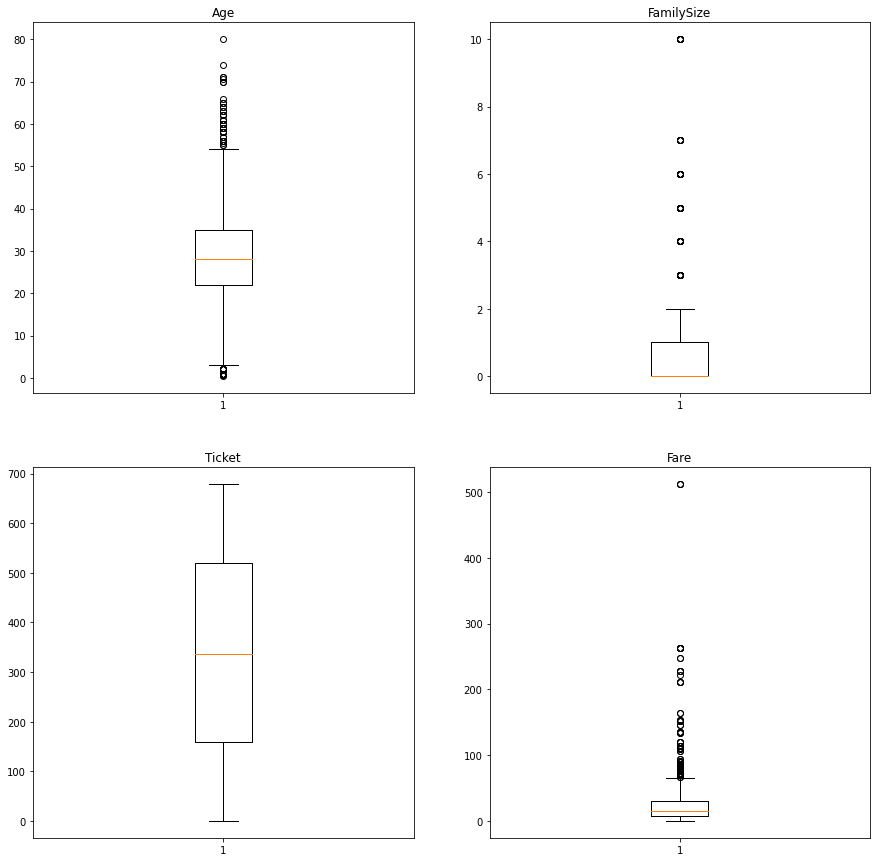

In [20]:
# Checking for Outliers

# column names in a  dictionary
columns_dict = {'Age':1, 'FamilySize':2,
       'Ticket': 3, 'Fare': 4}

plt.figure(figsize=(15,15))

# boxplots for columns in dictionary
for variable, i in columns_dict.items():
  plt.subplot(2,2,i)
  plt.boxplot(data[variable])
  plt.title(variable)




the outliers for Age, SibSp and parch are valid and removing them would affect our model

Exploratory Data Analysis

---



---



Univariate analysis

(array([ 54.,  46., 177., 346., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

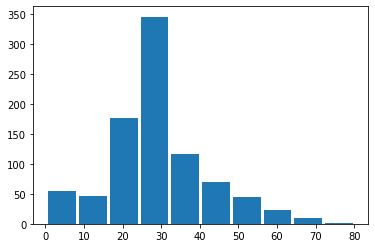

In [21]:
# frequency distribution of age
plt.hist(data['Age'], bins=10, histtype='bar', rwidth=0.9)

majority age was between 20 to 40. the least  was 70 and 80

(array([  3.,   1.,   1.,   8.,   1.,   2., 224., 517., 125.,   7.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

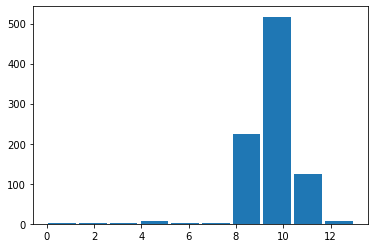

In [22]:
# frequency distribution for title
plt.hist(data['Title'], bins=10, rwidth=.9)

majority was group had titles Mr, Miss, and Mrs

(array([535., 161., 102.,  29.,  15.,  22.,  12.,   6.,   0.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

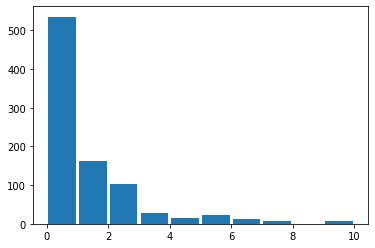

In [23]:
# histogram for the family size
plt.hist(data['FamilySize'], bins=10, rwidth=.9)

In [24]:
# frequency for male and female
data['Sex'].value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [25]:
# value count for pclass
data['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [26]:
# value count for pclass
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [27]:
# measures of dispersion
data.describe()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.315152,338.262092,32.096681,1.535433,9.748031,0.906637
std,0.486260,0.834700,0.477538,12.984932,200.477425,49.697504,0.792088,1.128839,1.614703
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,159.000000,7.895800,1.000000,9.000000,0.000000
50%,0.000000,3.000000,1.000000,28.000000,336.000000,14.454200,2.000000,10.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,519.000000,31.000000,2.000000,10.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,679.000000,512.329200,2.000000,13.000000,10.000000


Bivariate Analysis

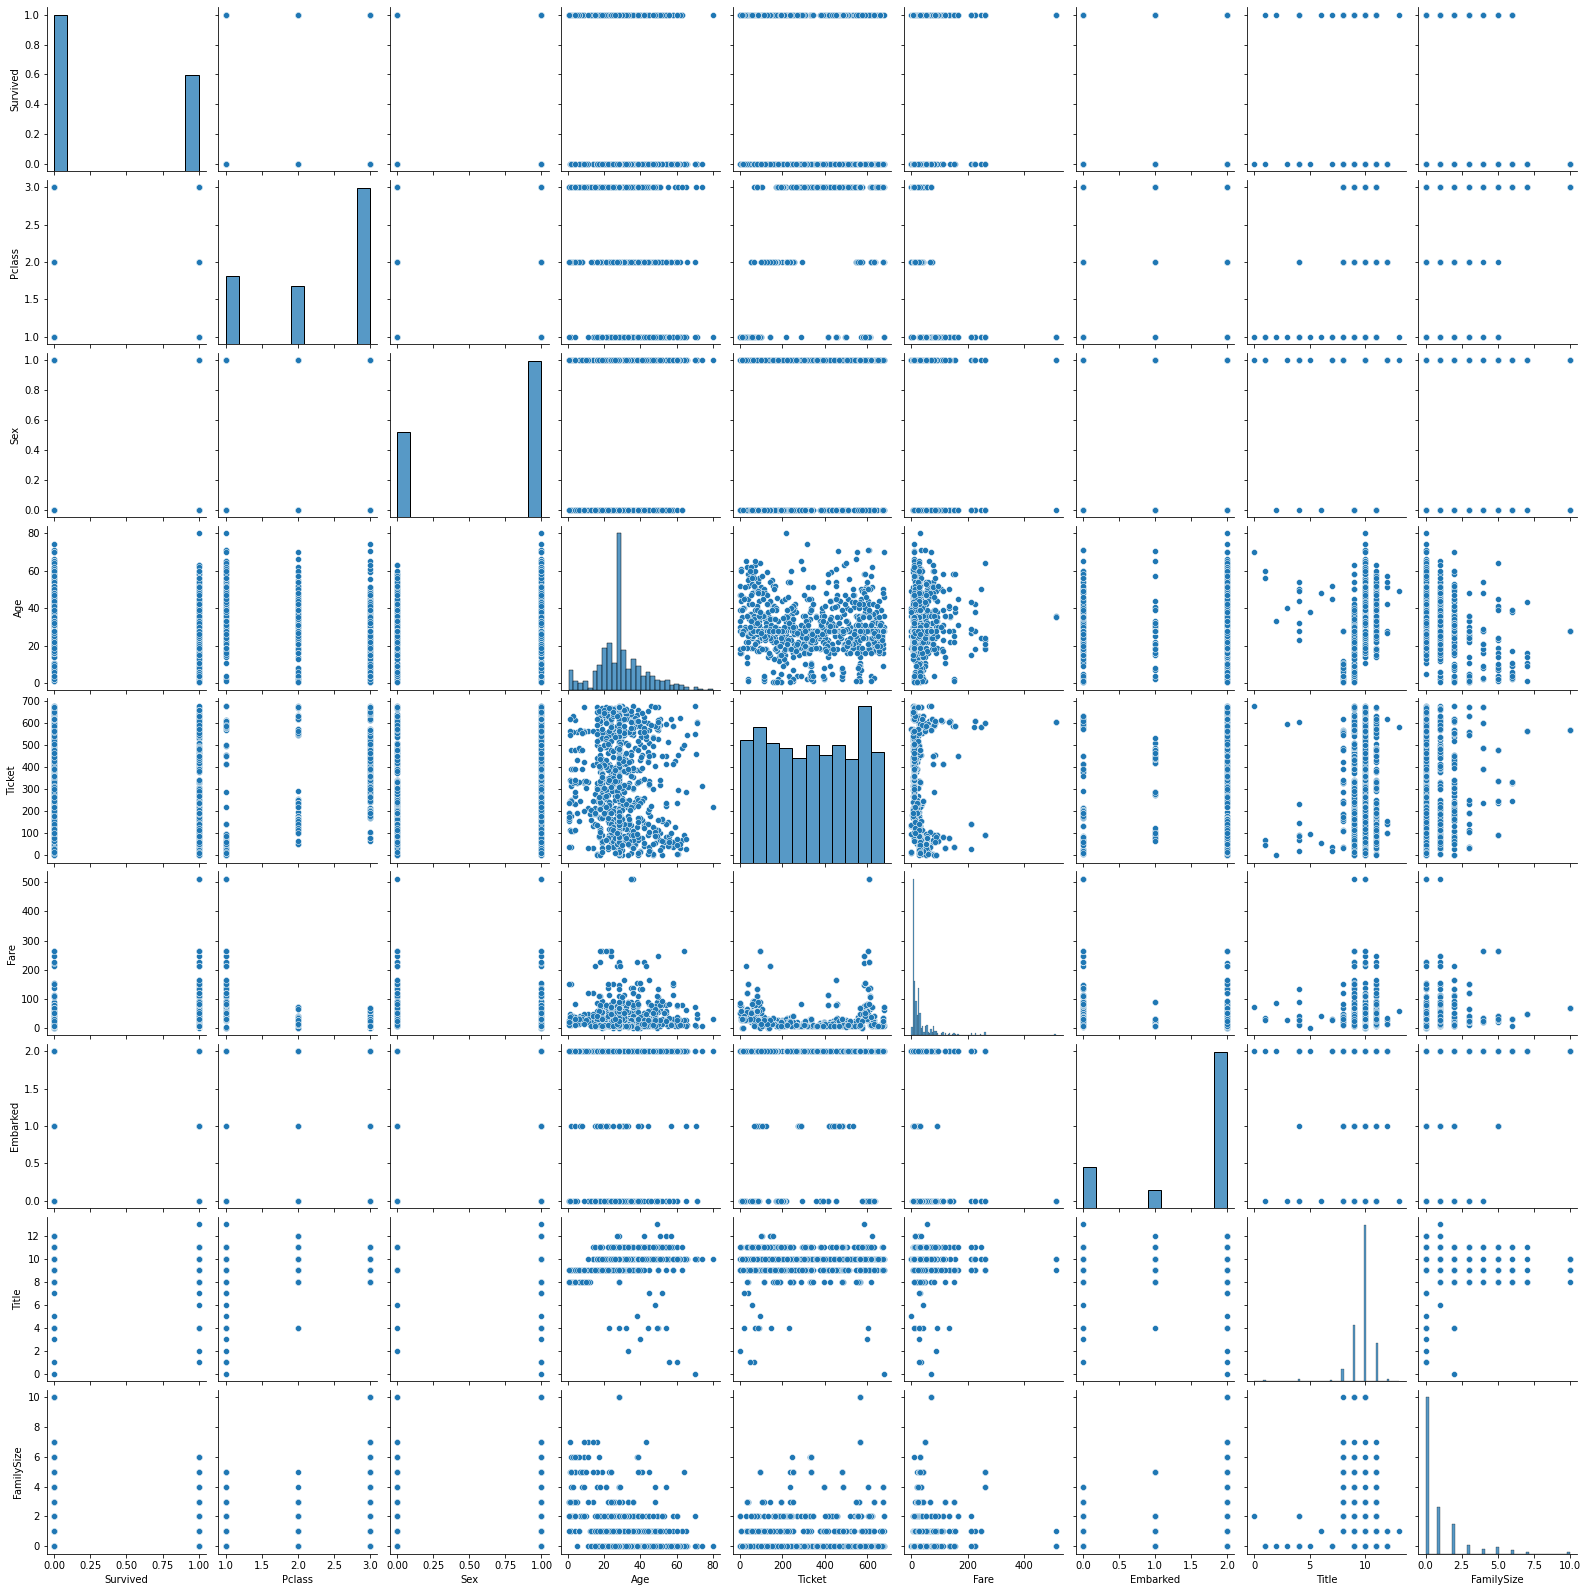

In [42]:
# Ploting the bivariate summaries

sns.pairplot(data)
plt.show()

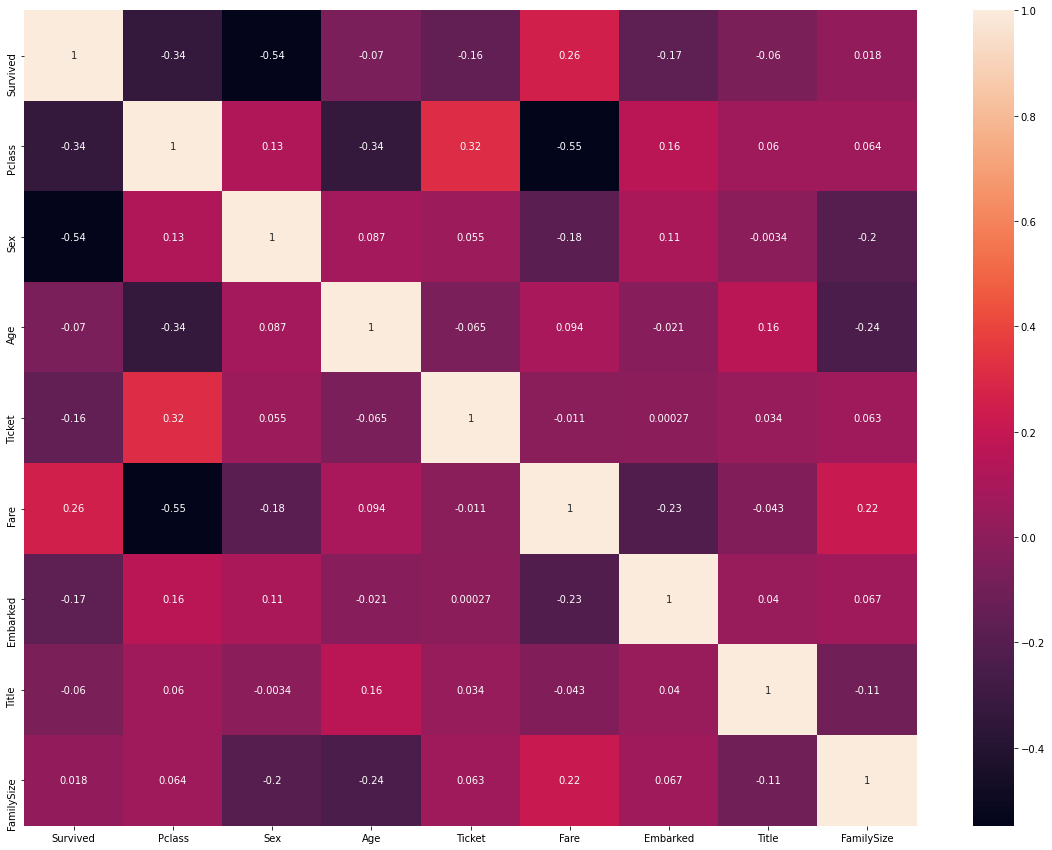

In [41]:
# Pearson correlation coefficients

plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

there is a high negative correlation between survived and the sex columns, Pclass and Fare. generally the correlations were a bit low

## 7. Implementing the Solution

K Nearest Neigbors

In [29]:
# Dividing dataset into features and labels
X = data.drop(columns = ['Survived'])
X
y = data['Survived']

In [30]:
# splitting data into train and test set
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 42)

In [31]:
clf = KNeighborsRegressor(10)
clf.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [32]:
# making our predictions
#
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred.round()))

0.33707865168539325


In [33]:
# splitting the dataset into 70, 30 train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .3)

# fitting our train data to the algorithm
clf = KNeighborsRegressor(10)
clf.fit(X_train, y_train)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [34]:
# making our predictions
#
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred.round()))

0.352059925093633


In [49]:
# splitting the dataset into 60, 40 train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = .4)

clf = KNeighborsRegressor(7)
clf.fit(X_train, y_train)
# making our predictions
#
y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred.round()))

0.3651685393258427


K Nearest neighbors
- Optimization techniques

In [36]:
# Feature scalling

s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [37]:
# performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


In [38]:
# training and making predictions

# Training our algorithm
# ---
# 
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [39]:
# making our prediction 
y_pred = clf.predict(X_test)


In [40]:

# Evaluate performance of the algorithm 
# with the help of a confusion matrix and the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


cm = confusion_matrix(y_test, y_pred.round())
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred.round())))

[[191  23]
 [ 46  96]]
Accuracy0.8061797752808989


## 8. Challenging the solution

the model performance improves significantly when we applied the LDA technique as compared to the base model.
Also, the performance improved as we continuersly changed the K value. 

## 9. Follow up questions

### a). Did we have the right data?

Yes, we did. the data was sufficient to for testing and training of the model.

### b). Do we need other data to answer our question?

Yes, we do to evaluate how our model performs on unseen data

### c). Did we have the right question?

We did. the experiment was a success